In [112]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

df = pd.read_csv('combined_df.csv',thousands=',')
df.head()

,Name,Action,2018/19,2019/20,2020/21,2021/22,2022/23,May2023/24
0,Algeria,consumption,2080,2124,1936,1889,1682,1897
1,Algeria,ending,420,430,387,377,336,375
2,Algeria,export,208,334,364,366,360,365
3,Algeria,import,2328,2468,2257,2245,2001,2301
4,Argentina,production,1570,1750,1830,1700,1670,1690


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        135 non-null    object
 1   Action      135 non-null    object
 2   2018/19     135 non-null    int64 
 3   2019/20     135 non-null    int64 
 4   2020/21     135 non-null    int64 
 5   2021/22     135 non-null    int64 
 6   2022/23     135 non-null    int64 
 7   May2023/24  135 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 8.6+ KB


In [114]:
df = df.rename({'Name':'Country'},axis=1)

In [115]:
dummy_df = []
action_list = df['Action'].unique()
num_cols = ['2018/19','2019/20', '2020/21','2021/22','2022/23','May2023/24']
df.drop('May2023/24',inplace=True,axis=1)
df.columns = ['Country','Action','2018','2019','2020','2021','2022']
for action in action_list:
    temp_df = df[df['Action'] == action].copy()
    temp_df.drop('Action',inplace=True,axis=1)
    temp_df = temp_df[(temp_df['Country']!='Total' ) & (df['Country']!='Other')]
    dummy_df.append(temp_df.melt(id_vars='Country',var_name='Year',value_name=action).reset_index(drop=True))
consump_df, end_df, export_df, import_df, prod_df = dummy_df
consump_df

C:\Users\Najib\AppData\Local\Temp\ipykernel_19884\2008533903.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = temp_df[(temp_df['Country']!='Total' ) & (df['Country']!='Other')]
C:\Users\Najib\AppData\Local\Temp\ipykernel_19884\2008533903.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = temp_df[(temp_df['Country']!='Total' ) & (df['Country']!='Other')]
C:\Users\Najib\AppData\Local\Temp\ipykernel_19884\2008533903.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = temp_df[(temp_df['Country']!='Total' ) & (df['Country']!='Other')]
C:\Users\Najib\AppData\Local\Temp\ipykernel_19884\2008533903.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = temp_df[(temp_df['Country']!='Total' ) & (df['Country']!='Other')]
C:\Users\Najib\AppData\Local\Temp\ipykernel_19884\2008533903.py:9: UserWarning: Boolean Series key will be reind

,Country,Year,consumption
0,Algeria,2018,2080
1,Bangladesh,2018,2519
2,Brazil,2018,10600
3,China,2018,15800
4,Colombia,2018,1858
...,...,...,...
120,Sudan,2022,1789
121,Thailand,2022,3100
122,Turkey,2022,3400
123,United_States,2022,11498


In [136]:
consump_df = consump_df.sort_values(['consumption','Year'],ascending=[False,True])
consump_df_2022 = consump_df[consump_df['Year']=='2022']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'European_Union'),
  Text(2, 0, 'China'),
  Text(3, 0, 'United_States'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'Indonesia'),
  Text(6, 0, 'Russia'),
  Text(7, 0, 'Pakistan'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Egypt'),
  Text(10, 0, 'Turkey'),
  Text(11, 0, 'Thailand')])

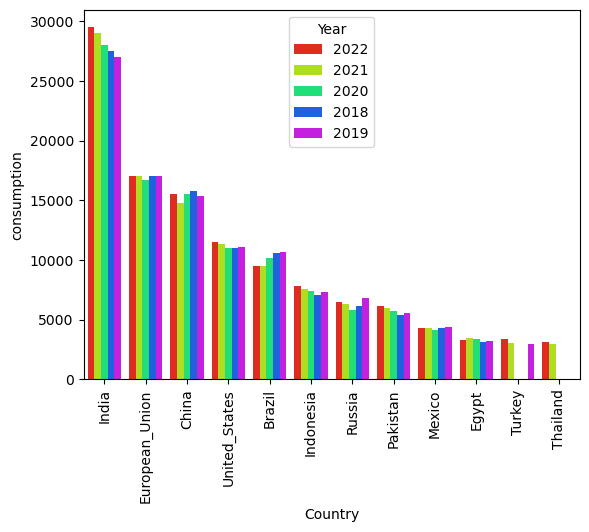

In [140]:
sns.barplot(data=consump_df.head(55), x='Country', y = 'consumption',hue='Year',palette=sns.hls_palette(5, l=0.5, s=1))
plt.xticks(rotation=90)

In [164]:
def display_bar(df,action,top_n=10,title=None):
    top_10 = df.sort_values(by=action,ascending=False).groupby('Year').head(top_n).sort_values(by=['Year',action],ascending=[True,False])
    sns.barplot(
        data=top_10,
        x = 'Country',
        y = 'production',
        hue = 'Year',
        palette=sns.hls_palette(5, l=0.5, s=1)
    )
    plt.xticks(rotation=90)
    plt.title(title)

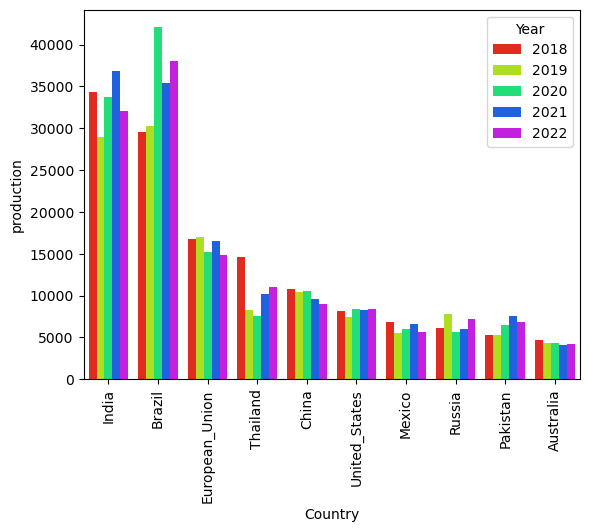

In [165]:
display_bar(prod_df,'production')

In [161]:
prod_df[prod_df['Country']=="Thailand"]

,Country,Year,production
19,Thailand,2018,14581
44,Thailand,2019,8294
69,Thailand,2020,7587
94,Thailand,2021,10157
119,Thailand,2022,11040
